Text(0, 0.5, 'Min and max temperature')

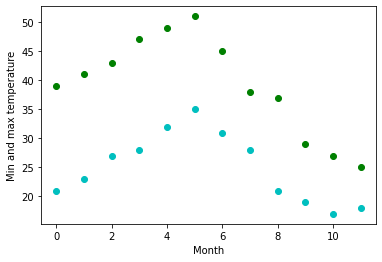

In [1]:
# We have the min and max temperatures in a city In India for each months of the year.
# We would like to find a function to describe this and show it graphically, the dataset
# given below.


import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

## Fitting it to a periodic function

In [2]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])
print(res_max)
print(res_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


## Plotting the fit

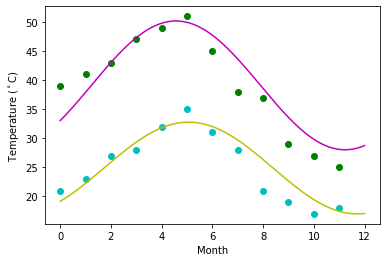

In [3]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [4]:
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male/Female proportion')

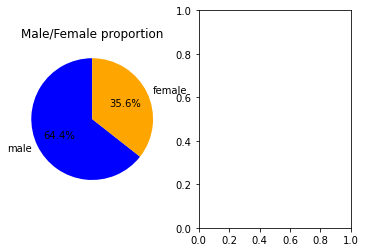

In [5]:
#### 1. Create a pie chart presenting the male/female proportion


count=titanic['sex'].value_counts()
colors = ['blue', 'orange']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90, autopct='%1.1f%%')
ax1.set_title('Male/Female proportion')

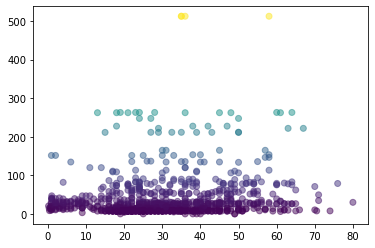

In [6]:
#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

scatter_plot = plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, 
                           c=titanic['fare'])
plt.show()